### Vizualizarea corelatiei dintre PIB si producerea de energie regenerabila

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Setăm căile fișierelor
shapefile_path = "Landuri_DE.shp"
csv_path = "energie_si_economie_germania.csv"

# Încărcăm datele
gdf = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path)

# Verificăm denumirile
print("Coloane shapefile:", gdf.columns)
print("Coloane CSV:", df.columns)

# Realizăm merge pe baza numelui landului
gdf = gdf.merge(df, left_on="NUTS_NAME", right_on="Land")

# Afișăm primele rânduri pentru validare
gdf.head()

Coloane shapefile: Index(['OBJID', 'BEGINN', 'GF', 'NUTS_LEVEL', 'NUTS_CODE', 'NUTS_NAME',
       'geometry'],
      dtype='object')
Coloane CSV: Index(['Land', 'PIB_capita', 'Energie_regenerabila_pct', 'Consum_capita',
       'Educatie_pct', 'Urbanizare_pct'],
      dtype='object')


,OBJID,BEGINN,GF,NUTS_LEVEL,NUTS_CODE,NUTS_NAME,geometry,Land,PIB_capita,Energie_regenerabila_pct,Consum_capita,Educatie_pct,Urbanizare_pct
0,DEBKGNU2000000D7,2023-10-04,4,1,DE2,Bayern,"POLYGON ((797853.293 5352195.002, 797799.497 5...",Bayern,28860,47.5,6041,39.1,74.8
1,DEBKGNU2000000D8,2023-10-04,4,1,DE3,Berlin,"POLYGON ((802831.687 5845501.783, 802754.455 5...",Berlin,39284,26.3,6824,26.5,84.0
2,DEBKGNU2000000D9,2023-10-04,4,1,DE4,Brandenburg,"MULTIPOLYGON (((716696.488 5861647.284, 716600...",Brandenburg,34265,33.1,6612,53.9,69.9
3,DEBKGNU2000000DC,2023-10-04,4,1,DE7,Hessen,"MULTIPOLYGON (((476929.894 5496705.669, 476984...",Hessen,44023,55.3,6556,51.3,99.5
4,DEBKGNU2000000DF,2023-10-04,4,1,DEA,Nordrhein-Westfalen,"MULTIPOLYGON (((301890.303 5600399.203, 301901...",Nordrhein-Westfalen,30433,46.7,4034,23.1,65.2


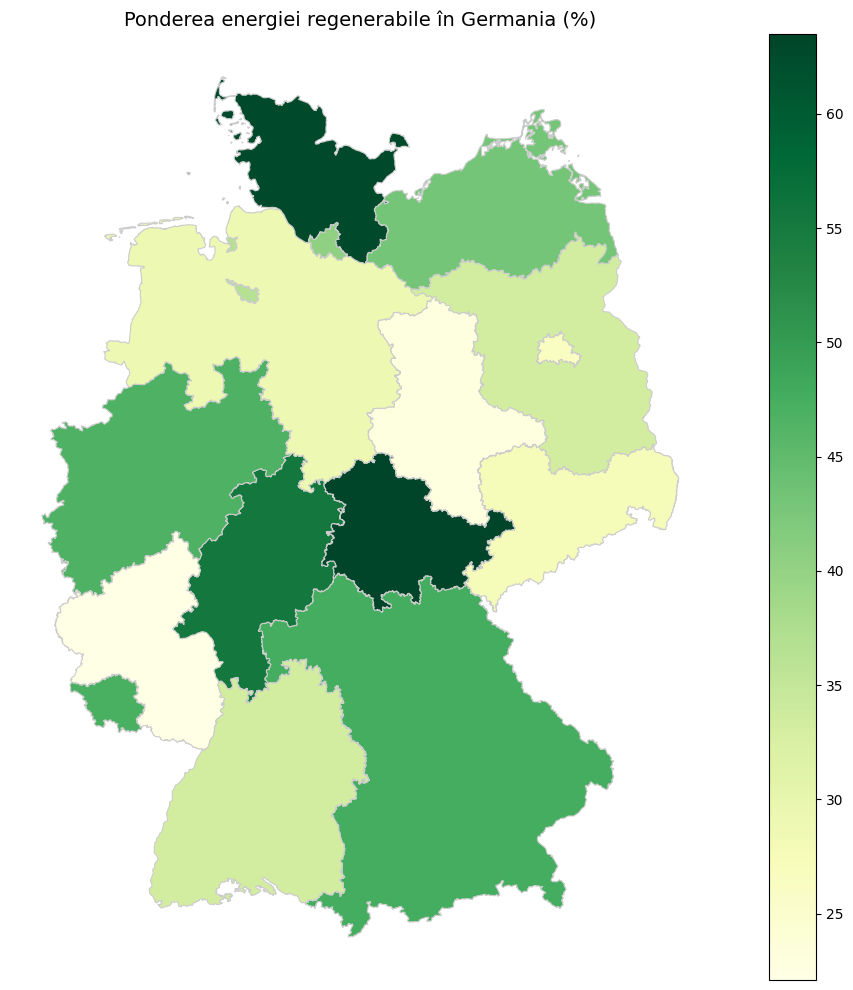

In [3]:
# Crearea hartii statice pentru PIB per capita în Germania

fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="Energie_regenerabila_pct",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)
ax.set_title("Ponderea energiei regenerabile în Germania (%)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

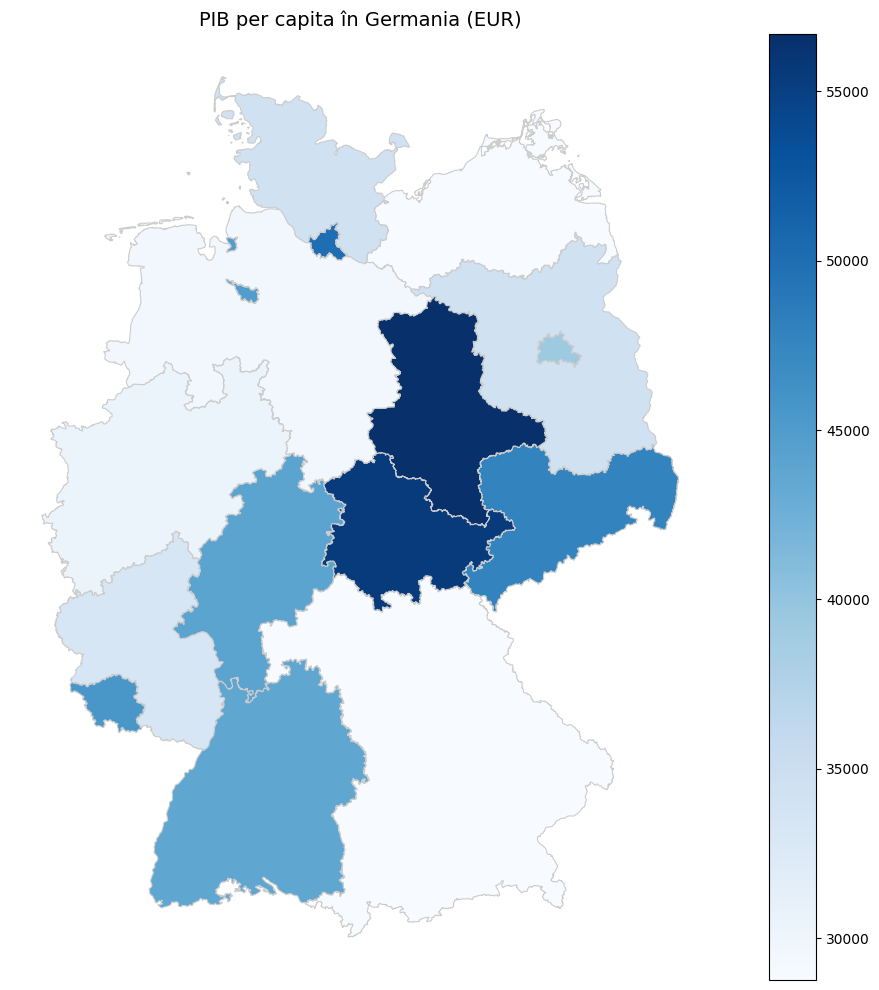

In [4]:
# Crearea hartii statice pentru Ponderea energiee regenerabile per capita în Germania
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="PIB_capita",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)
ax.set_title("PIB per capita în Germania (EUR)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

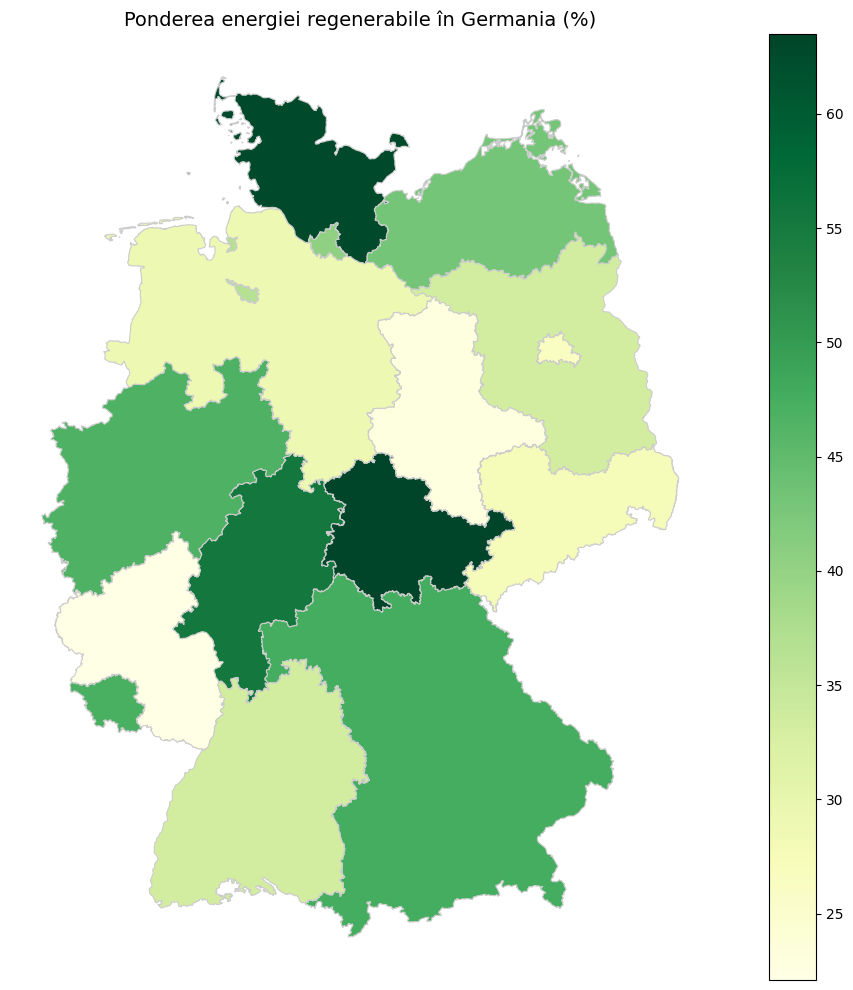

In [5]:
# Salvarea hărților in format .pdf
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(
    column="Energie_regenerabila_pct",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)
ax.set_title("Ponderea energiei regenerabile în Germania (%)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("harta_energie_regenerabila.pdf")
plt.show()